# Environmetal sound classification


<a href="https://colab.research.google.com/github/GianmarcoLattaruolo/Vision_Project/blob/main/Vision_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory analysis




Run this cell again if you modify some scripts.

In [54]:
import sys  
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import librosa
from scipy.io import wavfile
import seaborn as sb
sb.set(style="white", palette="muted")
import pandas as pd
import IPython.display as ipd
import time
from scipy import signal


#libraries
main_dir = os.getcwd()
module_path = main_dir
if module_path not in sys.path:
    print('Adding the folder for the modules')
    sys.path.append(module_path)

import importlib
from Preprocessing.data_loader import download_dataset,load_metadata
from Preprocessing.exploration_plots import one_random_audio, plot_clip_overview, Spectral_Analysis

Run this cell once to download the dataset.


In [55]:
in_colab = 'google.colab' in sys.modules
if in_colab:
    print('Downloading the ESC-50 dataset')
    download_dataset('ESC-50')

## Preliminary Exploration of the dataset

In this cell we can listen to one random audio in our dataset (different every time we run the cell). 
Moreover we visualize a portion of the audio.


The sample rate is44100
The data shape is (220500,)
Audio category: helicopter


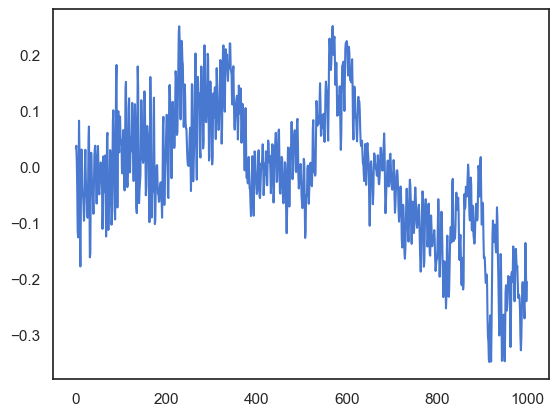

In [56]:
importlib.reload(importlib.import_module('Preprocessing.exploration_plots'))
from Preprocessing.exploration_plots import one_random_audio
audio, samplerate = one_random_audio(main_dir)

With this cell we load the pandas dataframe with the information about the datsets.

In [57]:
importlib.reload(importlib.import_module('Preprocessing.data_loader'))
from Preprocessing.data_loader import load_metadata
df_ESC10, df_ESC50 , df_ESC_US = load_metadata(main_dir, ESC_US = True, statistics=True)
# default values are:
# heads = True, statistics = False, audio_listen = False, ESC50=True, ESC10=True, ESC_US=False

filename  fold  target        category  esc10  src_file take  \
0   1-100032-A-0.wav     1       0             dog   True    100032    A   
1  1-100038-A-14.wav     1      14  chirping_birds  False    100038    A   
2  1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A   
3  1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B   
4  1-101296-A-19.wav     1      19    thunderstorm  False    101296    A   

                                           full_path  
0  c:\Users\latta\GitHub\Human_Data_Analytics_Pro...  
1  c:\Users\latta\GitHub\Human_Data_Analytics_Pro...  
2  c:\Users\latta\GitHub\Human_Data_Analytics_Pro...  
3  c:\Users\latta\GitHub\Human_Data_Analytics_Pro...  
4  c:\Users\latta\GitHub\Human_Data_Analytics_Pro...

Classes in the full dataset  are perfectly balanced
 Counter({'dog': 40, 'chirping_birds': 40, 'vacuum_cleaner': 40, 'thunderstorm': 40, 'door_wood_knock': 40, 'can_opening': 40, 'crow': 40, 'clapping': 40, 'fireworks': 40, 'chainsaw': 40, 'airplane': 40, 'mouse_click': 40, 'pouring_water': 40, 'train': 40, 'sheep': 40, 'water_drops': 40, 'church_bells': 40, 'clock_alarm': 40, 'keyboard_typing': 40, 'wind': 40, 'footsteps': 40, 'frog': 40, 'cow': 40, 'brushing_teeth': 40, 'car_horn': 40, 'crackling_fire': 40, 'helicopter': 40, 'drinking_sipping': 40, 'rain': 40, 'insects': 40, 'laughing': 40, 'hen': 40, 'engine': 40, 'breathing': 40, 'crying_baby': 40, 'hand_saw': 40, 'coughing': 40, 'glass_breaking': 40, 'snoring': 40, 'toilet_flush': 40, 'pig': 40, 'washing_machine': 40, 'clock_tick': 40, 'sneezing': 40, 'rooster': 40, 'sea_waves': 40, 'siren': 40, 'cat': 40, 'door_wood_creaks': 40, 'crickets': 40})


filename  fold  target        category  src_file take  \
0    1-100032-A-0.wav     1       0             dog    100032    A   
14   1-110389-A-0.wav     1       0             dog    110389    A   
24  1-116765-A-41.wav     1      41        chainsaw    116765    A   
54   1-17150-A-12.wav     1      12  crackling_fire     17150    A   
55  1-172649-A-40.wav     1      40      helicopter    172649    A   

                                            full_path  
0   c:\Users\latta\GitHub\Human_Data_Analytics_Pro...  
14  c:\Users\latta\GitHub\Human_Data_Analytics_Pro...  
24  c:\Users\latta\GitHub\Human_Data_Analytics_Pro...  
54  c:\Users\latta\GitHub\Human_Data_Analytics_Pro...  
55  c:\Users\latta\GitHub\Human_Data_Analytics_Pro...

Classes in ESC10 
 ['helicopter', 'sneezing', 'dog', 'sea_waves', 'chainsaw', 'rooster', 'rain', 'crackling_fire', 'clock_tick', 'crying_baby']

librosa takes : 7.26842999458313
the lengths are {220500}
the sample rates are {44100}
Loading the 1/2 folder of unlabeled data 
Loading the 2/2 folder of unlabeled data 
We have 20000 unlabeled audios.


filename                                          full_path
0    000001-55-0-5.ogg  c:\Users\latta\GitHub\Human_Data_Analytics_Pro...
1  000002-55-10-15.ogg  c:\Users\latta\GitHub\Human_Data_Analytics_Pro...
2  000003-55-20-25.ogg  c:\Users\latta\GitHub\Human_Data_Analytics_Pro...
3  000004-55-30-35.ogg  c:\Users\latta\GitHub\Human_Data_Analytics_Pro...
4  000005-55-40-45.ogg  c:\Users\latta\GitHub\Human_Data_Analytics_Pro...

We can say that, as we expected, this type of analysis on the entire audio clip is meaningless. We'll need to fragment the audio clips.
But first let's produce some summary statistics about our dataset.

## Spectrogram Analysis

Now we dig in the analysis exploiting the natural structure of sound in nature. 
In particular we'll need the [Short-Time Fourier Transform](https://en.wikipedia.org/wiki/Short-time_Fourier_transform).

Frame length is 882
Overlap length is 441
The length of the windowed signal after padding with zeros (frames) is 882. 


Scipy STFT shape (442, 501)
Scipy; length of frequencies vector (442,)
Scipy; length of time vector (501,)


librosa STFT shape (442, 501)
Librosa frames_to_time has shape (501,), (the time vector for STFT)
Is it equal to the time vector of Scipy? True
Librosa fft_frequencies has shape (442,) (compute the frequencies given the sample_rate and the windowed length)
Is it equal to Scipy frequencies? True


The STFT converted in decibell domain ha shape (442, 501)
Librosa Mel spectrogram of the audio has shape (128, 501) 
Librosa MFCC features has shape (40, 501)




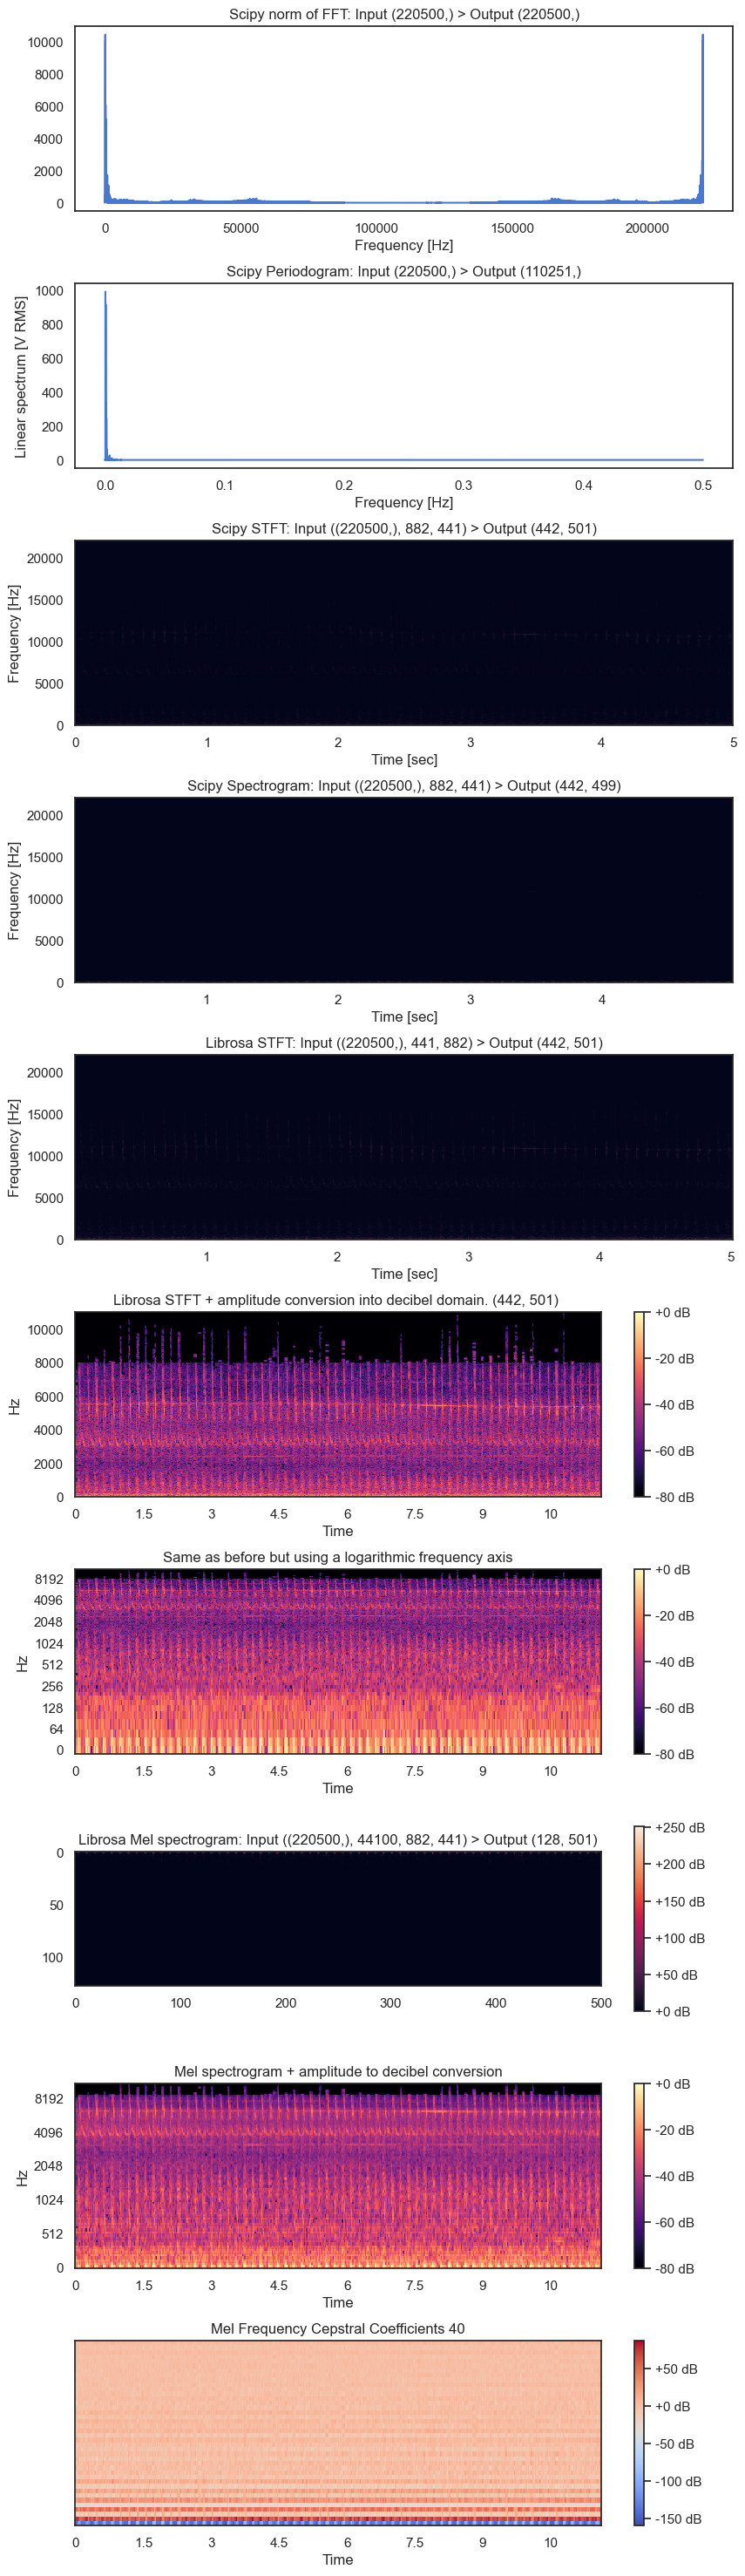

In [58]:
importlib.reload(importlib.import_module('Preprocessing.exploration_plots'))
from Preprocessing.exploration_plots import Spectral_Analysis
mfcc_audio = Spectral_Analysis(audio,
                                                   sample_rate = 44100,
                                                   segment = 20,
                                                   n_fft = None, #padd the frames with zeros before DFT
                                                   overlapping = 10,
                                                   cepstral_num = 40, #number of mel frequencies cepstral coefficients
                                                   N_filters = 50, #number of mel filters in frequency domain
                                                   plot = True, #default is false
                                                   verbose = True, #default is false
                                                   STFT_decibel = False,
                                                   Mel_spectrogram_decibel = False,
                                                   MFCC = True)

Now we plot 5 STFTs converted into decibel domain and in logarithm scale (plot number 6 in previous cell) for each category of audio in our dataset.

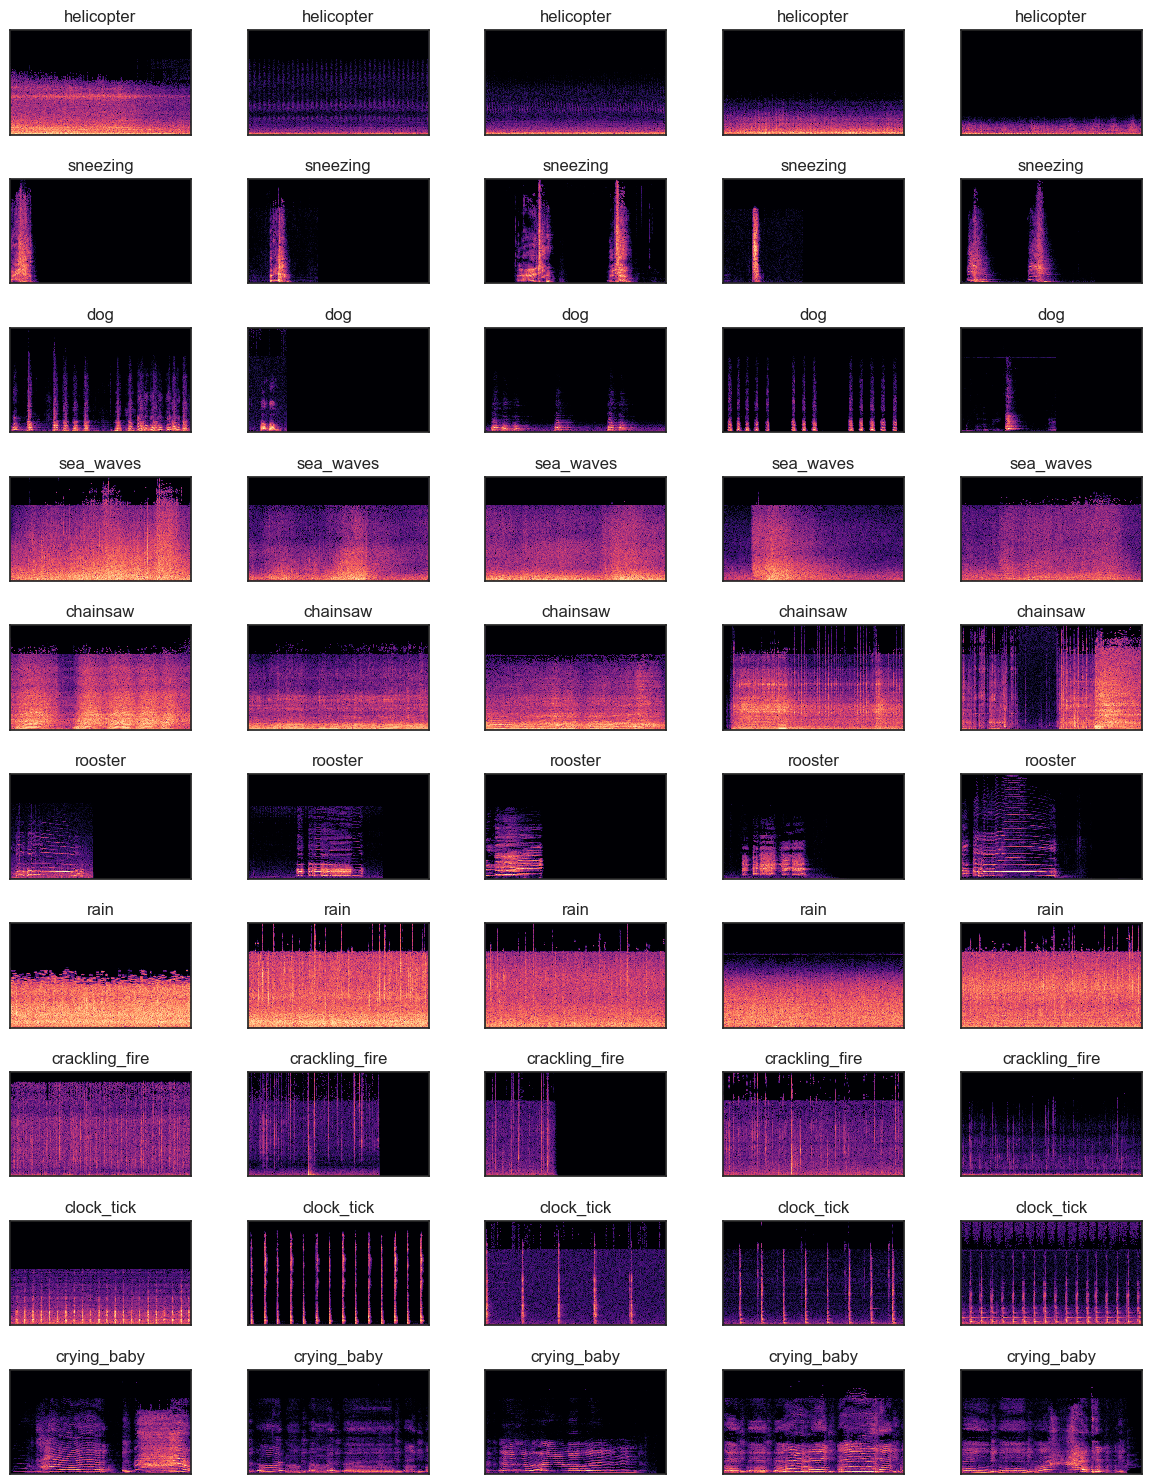

In [59]:
importlib.reload(importlib.import_module('Preprocessing.exploration_plots'))
from Preprocessing.exploration_plots import plot_clip_overview
plot_clip_overview(df_ESC10) #clearly you can pass only df_ESC10 or df_ESC50

C:\Users\latta\AppData\Local\Temp\ipykernel_11084\1388121586.py:2: UserWarning: pcen was called on complex input so phase information will be discarded. To suppress this warning, call pcen(np.abs(D)) instead.
  S_db = librosa.pcen(S*(2**31), max_size=5)


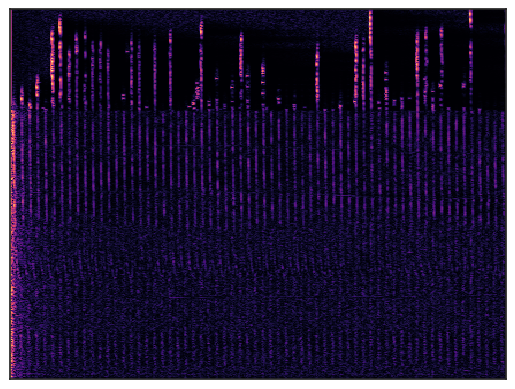

In [60]:
S = librosa.stft(audio)
S_db = librosa.pcen(S*(2**31), max_size=5)
librosa.display.specshow(S_db)



C:\Users\latta\AppData\Local\Temp\ipykernel_11084\548253010.py:1: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  S_db = librosa.amplitude_to_db(S)


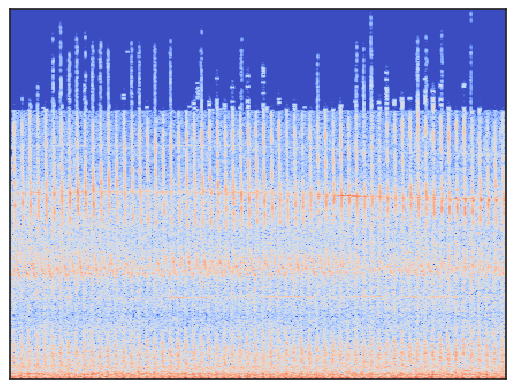

In [61]:
S_db = librosa.amplitude_to_db(S)
librosa.display.specshow(S_db)

Now let's create a dataset for our models.

## Dataset creation

The first approach we can try is to simply build pandas dataframes with our raw audio. 
We can see that this approach is unfeasible in the case of the unlabeled dataset.

### Pandas dataset

In [63]:
build_ESC_US_df = False
save_csv = False

audio_paths = df_ESC10.full_path

start_time = time.time()
audio_data = []
for audio_path in audio_paths:
    audio, _ = librosa.load(audio_path, sr=44100)  # Set sr=None to load the audio file with its original sampling rate
    audio_data.append(audio)
pd_df_ESC10 = pd.DataFrame({'audio': audio_data, 'target': df_ESC10['target']})
print(f'To build the ESC10 dataframe we need {time.time()-start_time} seconds.')
print(f'The pandas data frame for ESC10 occupies {sys.getsizeof(pd_df_ESC10)/1000} kbytes')

audio_paths = df_ESC50.full_path
start_time = time.time()
audio_data = []
for audio_path in audio_paths:
    audio, _ = librosa.load(audio_path, sr=44100)  # Set sr=None to load the audio file with its original sampling rate
    audio_data.append(audio)
pd_df_ESC50 = pd.DataFrame({'audio': audio_data, 'target': df_ESC50['target']})
print(f'To build the ESC50 dataframe we need {time.time()-start_time} seconds.')
print(f'The pandas data frame for ESC50 occupies {sys.getsizeof(pd_df_ESC50)/1000} kbytes')

if build_ESC_US_df:
        
    audio_paths = df_ESC_US.full_path
    start_time = time.time()
    audio_data = np.zeros((20000,220500), dtype=np.float16) # we must decrease a lot the precision to fit in our RAM.
    for i,audio_path in enumerate(audio_paths):
        if i%1000==0:
            print(f'Loading the {i}-th unlabeled audio')
        audio, _ = librosa.load(audio_path, sr=44100)  # Set sr=None to load the audio file with its original sampling rate
        audio_data[i,:] = audio
    pd_df_ESC_US = pd.DataFrame((audio_data),columns=[i for i in range(220500)])
    print(f'To build the ESC-US dataframe we need {time.time()-start_time} seconds.')
    print(f'The pandas data frame for ESC-US occupies {sys.getsizeof(pd_df_ESC_US)/1000} kbytes')
    
if save_csv:

    pd_df_ESC10.to_csv(path_or_buf=os.path.join(main_dir,'data','meta','dataset_ESC10.csv'), index=False)
    pd_df_ESC50.to_csv(path_or_buf=os.path.join(main_dir,'data','meta','dataset_ESC50.csv'), index=False)
    #pd_df_ESC_US.to_csv(path_or_buf=os.path.join(main_dir,'data','meta','dataset_ESC_US.csv'), index=False) #we cannot save this, it's too big!



To build the ESC10 dataframe we need 1.0759291648864746 seconds.
The pandas data frame for ESC10 occupies 54.416 kbytes
To build the ESC50 dataframe we need 9.737045288085938 seconds.
The pandas data frame for ESC50 occupies 256.144 kbytes


## Tensorflow dataset

We must follow the tensoflow dataset API strategy to handle the RAM limitation.

In [131]:
import tensorflow as tf
#tf.compat.v1.enable_eager_execution() # to check immediately
print(tf.executing_eagerly())
#tf.compat.v1.disable_eager_execution()


def create_tf_dataset(metadata):
    #metadata is a pandas dataframe with the metadata of the audios 
    audio_paths = metadata['full_path']

    if 'target' in metadata.columns:
        targets = metadata['target'] 

        def load_audio(audio_path, target):
            audio_path = audio_path.numpy().decode()
            print(audio_path)
            audio, _ = librosa.load(audio_path, sr=44100) 
            tensor_audio = tf.convert_to_tensor(audio, dtype=tf.float64, name='Audio_Raw')
            return tensor_audio, target
    
        tf_data = tf.data.Dataset.from_tensor_slices((audio_paths, targets),name = 'Audio_Raw')
        tf_data_map = tf_data.map(lambda audio_path, target: tf.py_function(load_audio, [audio_path, target],[tf.float64, tf.int32]), name = 'Audio_Raw')

    else:
        def load_audio(audio_path):
            audio_path = audio_path.numpy().decode()
            audio, _ = librosa.load(audio_path, sr=44100) 
            tensor_audio = tf.convert_to_tensor(audio, dtype=tf.float64)
            return tensor_audio
    
        tf_data = tf.data.Dataset.from_tensor_slices(audio_paths)
        tf_data_map = tf_data.map(lambda audio_path : tf.py_function(load_audio, [audio_path], [tf.float64, tf.int32]))

    return tf_data_map

tf_ESC10 = create_tf_dataset(df_ESC10)

False


In [132]:
tf_ESC50 = create_tf_dataset(df_ESC50)

for audio, target in tf_ESC50:
    # Perform operations with audio and target tensors
    print(audio, target)
    break

RuntimeError: `tf.data.Dataset` only supports Python-style iteration in eager mode or within tf.function.

In [ ]:
import tensorflow as tf

metadata = df_ESC_US

audio_paths = metadata['full_path']

def load_audio(audio_path):
    audio_path = audio_path.numpy().decode()
    audio, _ = librosa.load(audio_path, sr=44100) 
    tensor_audio = tf.convert_to_tensor(audio, dtype=tf.float64)
    return tensor_audio
    
#tf_data = tf.data.Dataset.from_tensor_slices((audio_paths)) #QUESTO CREA PROBLEMI 
#tf_data_map = tf_data.map(lambda audio_path : tf.py_function(load_audio, [audio_path], [tf.float64, tf.int32]))

#for audio in tf_df:
    # Perform operations with audio and target tensors
    #print(audio)
    #break

In [65]:
import tensorflow as tftf.enable_eager_execution() # to check immediately

import pandas as pd
import os
import librosa

audio_path = df_ESC10.full_path
path0 = audio_path[0]

tf.audio.decode_wav(
    contents=path0, desired_channels=-1, desired_samples=-1, name=None
)





AttributeError: module 'tensorflow' has no attribute 'enable_eager_execution'

In [ ]:
def load_audio(audio_path):
    audio, _ = librosa.load(audio_path, sr=44100) 
    return audio

preprocessed_audio = []
labels = []

for audio_file in audio_paths:
    preprocessed_audio.append(load_audio(audio_file))

# Convert the preprocessed audio and labels lists to TensorFlow tensors
preprocessed_audio = tf.convert_to_tensor(preprocessed_audio)
labels = tf.convert_to_tensor(df_ESC10['target'])

# Create a TensorFlow dataset using the preprocessed audio and labels
dataset = tf.data.Dataset.from_tensor_slices((preprocessed_audio, labels))

# Now you can perform batching, caching, and other operations on the dataset as needed

## Tensorflow dataset map

In [ ]:
import tensorflow as tf
import pandas as pd
import os
from pathlib import Path

# Define the directory path containing the audio files
audio_directory = '/Users/leonardo/Desktop/HDA/Human_Data_Analytics_Project_2023/data/ESC-50/'

# Filter the audio files based on the filenames in the dataframe
audio_files = [os.path.join(audio_directory, filename) for filename in df_ESC10['filename']]

print(type(audio_files[0]))

# Define a function to load and preprocess each audio file
def load_audio(path,target):
    path = Path(str(path).replace('\\\\','\\')[2:-1])
    print(path)
    audio, _ = librosa.load(path,sr=44100) 
    audio =  tf.convert_to_tensor(audio)
    return audio, target


# Create a TensorFlow dataset from the audio files and labels

dataset = tf.data.Dataset.from_tensor_slices((df_ESC10.full_path, df_ESC10.target)) 

dataset = dataset.map(load_audio)

nsor("args_0:0", shape=(), dtype=string


C:\Users\latta\AppData\Local\Temp\__autograph_generated_filewipt8c4u.py:140: UserWarning: PySoundFile failed. Trying audioread instead.
  ag__.converted_call(ag__.ld(warnings).warn, ('PySoundFile failed. Trying audioread instead.',), dict(stacklevel=2), fscope)
c:\Users\latta\miniconda3\envs\tensorf_env\lib\site-packages\tensorflow\python\autograph\impl\api.py:439: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  result = converted_f(*effective_args, **kwargs)


StagingError: in user code:

    File "C:\Users\latta\AppData\Local\Temp\ipykernel_30708\599335664.py", line 10, in load_audio  *
        audio, _ = librosa.load(path,sr=44100)
    File "c:\Users\latta\miniconda3\envs\tensorf_env\lib\site-packages\librosa\core\audio.py", line 184, in load  *
        y, sr_native = __audioread_load(path, offset, duration, dtype)
    File "c:\Users\latta\miniconda3\envs\tensorf_env\lib\site-packages\decorator.py", line 230, in fun  *
        return caller(func, *(extras + args), **kw)
    File "c:\Users\latta\miniconda3\envs\tensorf_env\lib\site-packages\librosa\util\decorators.py", line 60, in __wrapper  *
        return func(*args, **kwargs)
    File "c:\Users\latta\miniconda3\envs\tensorf_env\lib\site-packages\librosa\core\audio.py", line 241, in __audioread_load  *
        reader = audioread.audio_open(path)
    File "c:\Users\latta\miniconda3\envs\tensorf_env\lib\site-packages\audioread\__init__.py", line 127, in audio_open  *
        return BackendClass(path)
    File "c:\Users\latta\miniconda3\envs\tensorf_env\lib\site-packages\audioread\rawread.py", line 59, in __init__  **
        self._fh = open(filename, 'rb')

    OSError: [Errno 22] Invalid argument: 'nsor("args_0:0", shape=(), dtype=string'


In [ ]:
a = next(dataset.as_numpy_iterator())
print(str(a[0])[2:-1])
lx, _ = librosa.load(str(a[0]).replace('\\\\','\\')[2:-1], sr=44100)
print(lx.shape)

c:\\Users\\latta\\GitHub\\Human_Data_Analytics_Project_2023\\data\\ESC-50\\1-100032-A-0.wav
(220500,)


In [ ]:
for i,j in dataset:
    print(i.numpy(),j.numpy())

b'/Users/leonardo/Desktop/HDA/Human_Data_Analytics_Project_2023/data/ESC-50/1-100032-A-0.wav' 0
b'/Users/leonardo/Desktop/HDA/Human_Data_Analytics_Project_2023/data/ESC-50/1-110389-A-0.wav' 0
b'/Users/leonardo/Desktop/HDA/Human_Data_Analytics_Project_2023/data/ESC-50/1-116765-A-41.wav' 41
b'/Users/leonardo/Desktop/HDA/Human_Data_Analytics_Project_2023/data/ESC-50/1-17150-A-12.wav' 12
b'/Users/leonardo/Desktop/HDA/Human_Data_Analytics_Project_2023/data/ESC-50/1-172649-A-40.wav' 40
b'/Users/leonardo/Desktop/HDA/Human_Data_Analytics_Project_2023/data/ESC-50/1-172649-B-40.wav' 40
b'/Users/leonardo/Desktop/HDA/Human_Data_Analytics_Project_2023/data/ESC-50/1-172649-C-40.wav' 40
b'/Users/leonardo/Desktop/HDA/Human_Data_Analytics_Project_2023/data/ESC-50/1-172649-D-40.wav' 40
b'/Users/leonardo/Desktop/HDA/Human_Data_Analytics_Project_2023/data/ESC-50/1-172649-E-40.wav' 40
b'/Users/leonardo/Desktop/HDA/Human_Data_Analytics_Project_2023/data/ESC-50/1-172649-F-40.wav' 40
b'/Users/leonardo/Desktop

## Tensorflow kek

In [ ]:
import tensorflow as tf
import pandas as pd
import os

# Define the directory path containing the audio files
audio_directory = '/Users/leonardo/Desktop/HDA/Human_Data_Analytics_Project_2023/data/ESC-50/'

# Filter the audio files based on the filenames in the dataframe
audio_paths = [os.path.join(audio_directory, filename) for filename in df_ESC10['filename']]

print(type(audio_files[0]))

<class 'str'>


In [ ]:
def preprocess_audio(audio_path):
    audio_path = audio_path.decode('utf-8')
    audio_data, _ = librosa.load(audio_path, sr=44100)
    return audio_data

# Create a TensorFlow dataset
dataset = tf.data.Dataset.from_tensor_slices(audio_paths)



In [ ]:
for i in dataset:
   print(i)
   print(tf.compat.path_to_str(i))
   break

tf.Tensor(b'/Users/leonardo/Desktop/HDA/Human_Data_Analytics_Project_2023/data/ESC-50/1-100032-A-0.wav', shape=(), dtype=string)
tf.Tensor(b'/Users/leonardo/Desktop/HDA/Human_Data_Analytics_Project_2023/data/ESC-50/1-100032-A-0.wav', shape=(), dtype=string)


In [ ]:
# Apply preprocess_audio using tf.py_function
dataset = dataset.map(lambda x: tf.py_function(preprocess_audio, [x], [tf.float32]))

In [136]:
#tentativo mio
dataset = tf.keras.utils.audio_dataset_from_directory(
    directory = r'C:\Users\latta\GitHub\Human_Data_Analytics_Project_2023\data\ESC-50',
    labels=None,
    label_mode='int',
    class_names=None,
    batch_size=32,
    sampling_rate=None,
    output_sequence_length=None,
    ragged=False,
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    follow_links=False
)


Found 2000 files belonging to 1 classes.


ValueError: Expected values ([None, None], []) to be a dense tensor with shape [2, 2], but got shape [2].